In [67]:
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import nltk
from nltk.stem import PorterStemmer as ps
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import WordPunctTokenizer
stemmer = ps()
from nltk.stem.cistem import Cistem
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
pd.set_option("display.max_rows", None, "display.max_columns", None)
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#Unpickling dataframe 
object_df = pd.read_pickle("./unknown_makers_FINAL.pkl")

In [68]:
#This takes our descriptions and tokenizes them into a list
def tokenize_stem_descriptions(df, column_name):
    tokens = []
    punct_list ={'-',':','&','|', "'s", '...', ',', '!','?', 'hi', 'thi', 'em', '”', '+', 'would', '’', 'wa', '(' ,')','[', "'",']', ';', '“', '<', '>','/em', '/', 'p', '/p', '*', '$', '@', '%', '^', '~', '.', '='}
    description_list = []
    for description in df[column_name].dropna():
        description_list.append(description)
    for text in description_list:
        sublist = word_tokenize(text)
        for token in sublist:
            token = token.lower()
            token = stemmer.stem(token)
            if token not in stop_words | punct_list:
                tokens.append(str(token))
    tokens.sort()
    return tokens

In [69]:
#List to dictionary with count frequencies for wordcloud
def list_to_dict(item_list):
    new_dict = {}
    for category in item_list:
        if not category in new_dict.keys():
            new_dict[category] = 1
        else:
            new_dict[category] +=1
    return new_dict

In [70]:
#Making word cloud from dict
def make_cloud(title, wordle_dict):
    wordle_dict = list_to_dict(tokens)
    wordcloud = WordCloud(width=1600, height=800).generate_from_frequencies(wordle_dict)

#plot
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.figure(figsize=(24,14), dpi=1200)
    plt.show()
    wordcloud.to_file(title)

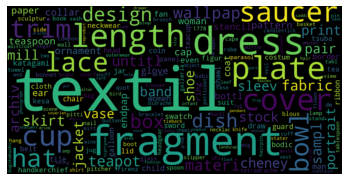

<Figure size 28800x16800 with 0 Axes>

In [71]:
word_list = tokenize_stem_descriptions(object_df, 'title')
word_dict = list_to_dict(word_list)
make_cloud('title_wordcloud.png', word_dict)


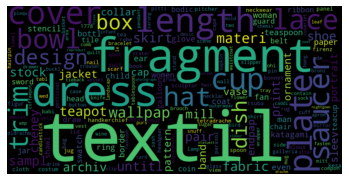

<Figure size 28800x16800 with 0 Axes>

In [72]:
word_list_descrip = tokenize_stem_descriptions(object_df, 'description')
word_dict_descrip = list_to_dict(word_list_descrip)
make_cloud('description_wordcloud.png', word_dict_descrip)

,Credit,Title,Dating,Description,Object Count
986,"Gift of Mr. John M. Sullivan, Jr.",Cheney Mills Archive,,,301
2308,The Gorham Collection. Gift of Textron Inc.,Teaspoon,,,122
2146,Museum Collection,textile,,,42
291,Georgianna Sayles Aldrich Fund,Fifty-one Stereoscopic Views,,,36
150,,stocking,,,32
2302,The Gorham Collection. Gift of Textron Inc.,Tablespoon,,,28
1329,Gift of Mrs. Henry Vaughan,Infant School Lessons,,,23
2112,Museum Collection,Wallpaper lenght,,,22
2198,Museum Works of Art Fund,endpaper,,,22
2215,Museum Works of Art Fund,textile,,,20


In [40]:
#List to dictionary with count frequencies for wordcloud
def list_to_dict(item_list):
    new_dict = {}
    for category in item_list:
        if not category in new_dict.keys():
            new_dict[category] = 1
        else:
            new_dict[category] +=1
    return new_dict

In [55]:
#This takes our descriptions and tokenizes them into a list
def tokenize_stem_titles(df):
    tokens = []
    punct_list ={'-',':','&','|', "'s", '...', ',', '!','?', '#', 'hi', '--', '039', 'thi', 'em', '”', '+', 'would', '’', 'wa', '(' ,')','[', "'",']', ';', '“', '<', '>','/em', '/', 'p', '/p', '*', '$', '@', '%', '^', '~', '.', '='}
    title_list = []
    for title in df['title'].dropna():
        title_list.append(title)
    for text in title_list:
        sublist = word_tokenize(text)
        for token in sublist:
            token = token.lower()
            token = stemmer.stem(token)
            if token not in stop_words | punct_list:
                tokens.append(str(token))
    tokens.sort()
    return tokens

In [56]:
tokens = tokenize_stem_titles(object_df)

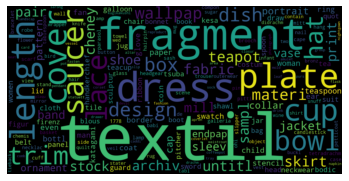

<Figure size 28800x16800 with 0 Axes>

In [57]:
#Our first (very simple) data viz!
wordle_dict = list_to_dict(tokens)
wordcloud = WordCloud(width=1600, height=800).generate_from_frequencies(wordle_dict)

#plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.figure(figsize=(24,14), dpi=1200)
plt.savefig('wordcloud_high_res.png', facecolor='k', bbox_inches='tight')
plt.show()
wordcloud.to_file('title_object_cloud.png')